<hr style="height: 1px;">
<i>This notebook was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 3: Gravitational Waves</h1>


<a name='section_3_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_1">L3.1 Introduction to Gravitational Waves</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_3_1">L3.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_2">L3.2 Identification of Gravitational Waves</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_3_2">L3.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_3">L3.3 Time-Frequency Analysis of Gravitational Wave Data</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_3_3">L3.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_4">L3.4 Signal-to-Noise Sensitivity</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_3_4">L3.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_5">L3.5 Pinpointing Gravitational Wave Events</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_3_5">L3.5 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

Within this Lesson, we will cover the following topics:

- What are gravitational waves?
- How are gravitational waves created?
- What is the effect of gravitational waves?
- How are gravitational waves detected?
- Analyzing data as a function of frequency instead of time
- Introduction to Fourier transforms
- Sources of noise in GW data
- How noise affects GW sensitivity
- How GW signals are found in the presence of noise
- More details of GW signal analysis
- Current and future GW detectors

<h3>Importing Data (Colab Only)</h3>

If you are in a Google Colab environment, run the cell below to import the data for this notebook. Otherwise, if you have downloaded the course repository, you do not have to run the cell below.

In [ ]:
#>>>RUN L3.0-runcell00

#Importing data:

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L03' >> .git/info/sparse-checkout
!git pull origin main

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook. 


In [1]:
#>>>RUN: L3.0-runcell01

import numpy as np                    #https://numpy.org/doc/stable/
from matplotlib import pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
from scipy.fft import fft, fftfreq    #https://docs.scipy.org/doc/scipy/reference/fft.html
                                      #https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [2]:
#>>>RUN: L3.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<a name='section_3_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.1 Introduction to Gravitational Waves</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_0) | [Exercises](#exercises_3_1) | [Next Section](#section_3_2) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides1.html" target="_blank">HERE</a>.

In [3]:
#>>>RUN: L3.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L03/slides1.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides1.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L03/slides1.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_3_1'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_1) | [Next Section](#section_3_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.1.1 Sources of Gravitational Waves</span>

Select from the following list any potential sources of gravitational waves?

- binary black hole mergers
- binary neutron star mergers
- supernovae
- cosmic energy bursts
- primordial axions


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
'binary black hole mergers','binary neutron star mergers','supernovae','cosmic energy bursts','primordial axions'
</pre>
        
**EXPLANATION:**
    
All of these are potential sources of gravitational waves. However, we have only observed gravitational waves from compact binary black hole mergers and binary neutron star mergers. Supernovae will produce enormous gravitational wave signatures and are something we hope to eventually see. There are many other sources of gravitational waves, nearly every astonomical object leaves a gravitational wave signature. One recent proposal is that we might be able to find dark matter with gravitational waves by looking for objects produced in the early universe during the big bang, like Primordial Axions. 
    
</div>


>#### Follow-up 3.1.1a (ungraded)
>   
>Why have we only observed binary object mergers so far?

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
They leave a clear signature that we know how to model. 
</pre>
        
**EXPLANATION:**
    
Objects that rotate around each other yield an oscillatory signature. This signature is very distinct and something we have been able to model with current gravitational simulations. More complex objects, such as supernovae will take time and understanding to really observe. 
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.1.2 Ratio of Distances to Identical GW Sources</span>

Assume two events that produce identical gravitational waves at their source occur at 500 MPc and 100 MPc away from Earth. What will be the ratio of the observed GW signal amplitudes of these events. Enter the ratio $GW_{500MPc}/GW_{100MPc}$ as a number.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
1/5
</pre>
        
**EXPLANATION:**
    
Gravitational waves get weaker with distance like 1/r. Therefore a gravitational wave source that is 5 times farther away will be 1/5 weaker, if the sources are identical in nature.
    
</div>


<a name='section_3_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.2 Identification of Gravitational Waves</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_1) | [Exercises](#exercises_3_2) | [Next Section](#section_3_3) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides2.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L3.2-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L03/slides2.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides2.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L03/slides2.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_3_2'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_2) | [Next Section](#section_3_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.2.1 Understanding the Length Scale of LIGO Measurements</span>

Currently LIGO is able to measure displacements on the order of $\Delta L \approx 3 \times 10^{-19}\,\mathrm{m}$. How does this compare to the established size of a proton? Specifically, what is the ratio $\Delta L /D$, where D is the diameter of a proton.

Enter your answer as a number with precision `5e-5`.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**EXPLANATION:**
    
A proton has a diameter $D \approx 0.84 \times 10^{-15}$, so the ratio in question is $\Delta L /D \approx 3.57 \times 10^{-4}$.
    
</div>


<a name='section_3_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.3 Time-Frequency Analysis of Gravitational Wave Data</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_2) | [Exercises](#exercises_3_3) | [Next Section](#section_3_4) |


<h3>Video Note</h3>

The audio files played in the video can be found in the related data directly for this notebook: data/L03

Also here: https://github.com/mitx-8s50/nb_LEARNER/blob/main/data/L03

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides3.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L3.3-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L03/slides3.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides3.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L03/slides3.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_3_3'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_3) | [Next Section](#section_3_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.3.1 Practice With Fourier Transforms I</span>

Let's practice using Fourier transforms on some data! First, let's just generate a dataset with two frequencies, say 400 Hertz and 4000 Hertz, then add them together and plot the sum.  What does the combination of the two waves look like? 

- You see a big sine wave corresponding to the lower frequency, with higher frequency sine waves oscillations superimposed along it
- The result does not look sinusoidal at all
- You see just one sine wave
- You see a beat pattern corresponding to the difference in the two frequencies
   
Use the starting code below to make these plots. You might want to take a look at the following resource to learn more about fft: https://docs.scipy.org/doc/scipy/tutorial/fft.html

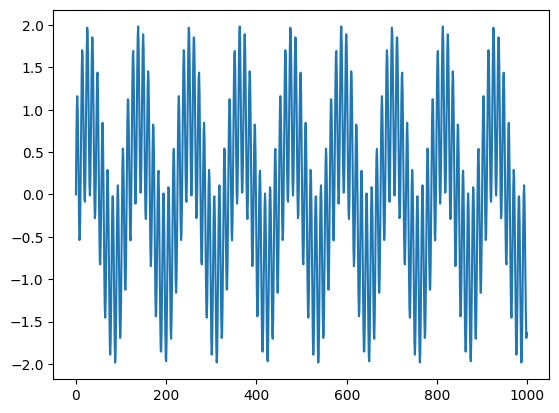

In [1]:
#>>>EXERCISE: L3.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np
from matplotlib import pyplot as plt

# First we'll create some data. 
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y
    
# Mix two different sine waves 
SAMPLE_RATE = 45000  # Hertz
DURATION = 5  # Seconds
_, tone1 = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, tone2 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

mixed_tone = tone1 + tone2

plt.plot(mixed_tone[:1000])
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
You see a big sine wave corresponding to the lower frequency, with higher frequency sine waves oscillations superimposed along it
</pre>
        
**EXPLANATION:**
    
This is just a plot to get you started thinking about how datasets containing more than one wave look like. 
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.3.2 Practice With Fourier Transforms II</span>

Now, run a Fourier transform on the mixed wave consisting of a 400 Hertz wave and a 4000 Hertz wave. Note the peaks in the Fourier spectrum. How does the transform change if you use two frequencies that are closer to each other? 

- The peaks in the Fourier spectrum get farther apart
- The peaks in the Fourier spectrum get closer together
- The Fourier spectrum does not change
   
Use the starting code below to make these plots. You might want to take a look at the following resource to learn more about fft: https://docs.scipy.org/doc/scipy/tutorial/fft.html

Notice that in the case of combining two fairly close frequencies, the summed distribution does not look sinusoidal at all!

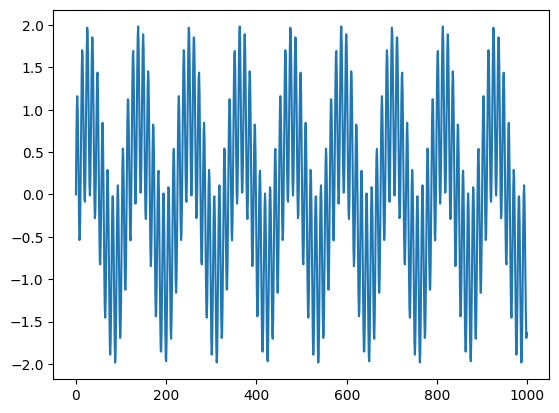

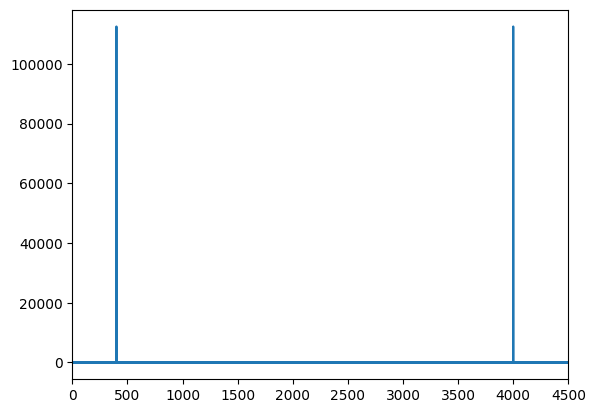

In [5]:
#>>>EXERCISE: L3.3.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

# First we'll create some data. 
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y
    
# Mix two different sine waves 
SAMPLE_RATE = 45000  # Hertz
DURATION = 5  # Seconds
_, tone1 = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, tone2 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

mixed_tone = tone1 + tone2

plt.plot(mixed_tone[:1000])
plt.show()


# Number of samples
N = SAMPLE_RATE * DURATION

# Perform Fourier transform
yf = fft(mixed_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.xlim(0,4500)
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>

The peaks get closer.

</pre>
        
**EXPLANATION:**
    
In Fourier space, the sum of two sine waves corresponds to delta functions at their frequency of generation, so the Fourier transform just gives us a peak at the frequency of each sine wave. By construction, the Fourier transform also gives a peak at the negative values of the same frequencies.

    
</div>


>#### Follow-up 3.3.2a (ungraded)
>   
>What is the integral of the Fourier spectrum? Why are we taking the absolute values when we plot the Fourier distribution?

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**
    
<pre>
</pre>
        
**EXPLANATION:**
    
The integral of the spectrum is the number of samples times 2 for the sum of two waves with amplitudes of 1. More generally, the integral is $N_{samples} \times \sum_{i}|A_{i}|$ where $A_{i}$ are the amplitudes of the waves. 

The output of the Fourier transform contains both a real component and an imaginary component, we take the absolute value to get the magnitude. 
    
</div>


<a name='section_3_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.4 Signal-to-Noise Sensitivity</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_3) | [Exercises](#exercises_3_4) | [Next Section](#section_3_5) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides4.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L3.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L03/slides4.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides4.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L03/slides4.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_3_4'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_4) | [Next Section](#section_3_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.4.1 Sources of High Frequency Noise</span>

What is a source of very high-frequency noise in gravitational wave detection? Choose the best answer from the following list.

- shot noise
- seismic noise
- cars and trucks
- electronic interference


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
shot noise
</pre>
        
**EXPLANATION:**
    
Shot noise, otherwise referred to as "Quantum Noise" is the noise coming from the laser beam. It can be reduced by increasing the intensity of the laser or by going into a squeezed state to reduce the overall position uncertainty, which allows for lower noise at high frequency. 
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 3.4.2 Sources of Low Frequency Noise</span>

What is a source of very low-frequency noise in gravitational wave detection? Again, choose the best answer from the following list.

- shot noise
- seismic noise
- cars and trucks
- electronic interference


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>

sesimic noise

</pre>
        
**EXPLANATION:**
    
Here the issue is to get to the lowest frequency of object. Cars and trucks are pretty low frequency, but seismic noise can be even lower. Furthermore, Seismic noise tends to dominate the low frequency noise limit. This is something we could potentially improve up and make a better experiment with. 
    
</div>


<a name='section_3_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.5 Pinpointing Gravitational Wave Events</h2>     

| [Top](#section_3_0) | [Previous Section](#section_3_4) | [Exercises](#exercises_3_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS3/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS3_vid5" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides5.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L3.5-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L03/slides5.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L03/slides5.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L03/slides5.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_3_5'></a>   

| [Top](#section_3_0) | [Restart Section](#section_3_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.5.1 Pinpointing GW Sources</span>

How many detectors (minimum) are needed to pinpoint a source in the sky? Enter your answer as a number.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
2
</pre>
        
**EXPLANATION:**
    
Two detectors give us a vector that we can point to in the sky. Imagine a wave hitting two points on earth at two different times. More and more detectors will help us narrow down in the sky where the source is!
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.5.2 Towards Precision Detection</span>

What is the *most precise* way to pinpoint the star system or region in which a GW event occurred?

- Upgrading existing GW detectors
- Adding more GW detectors
- Detecting a multi-messenger GW event using an optical telescope
- Detecting a multi-messenger GW event using a radio telescope


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>

Detecting a multi-messenger GW event using an optical telescope

</pre>
        
**EXPLANATION:**
    
Even if we have many LIGO detectors, our position resolution will never be great. However, telescopes have super precise position resolution. Unfortunately, we need to have an optical and GW event occurring simultaneously for this to be possible. This is what we call a multi-messenger event. 
    
</div>


<a name='section_3_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.6 An Example: Hubble Constant</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_5) | [Exercises](#exercises_3_6) | [Next Section](#section_4_7) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L04/slides_L04_01.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L4.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L04/slides_L04_01.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L04/slides_L04_01.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L04/slides_L04_01.html" width="900", height="550" frameBorder="0"/>
</p>

<a name='exercises_4_1'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_1) | [Next Section](#section_4_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.6.1 Expansion and Recessional Velocity</span>

True or False: If the universe is expanding, the apparent recessional velocity of galaxies further away will be larger.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

True

        
**EXPLANATION:**
        
Even if the recessional velocity of near and far galaxies may stay the same in their local frame, their observed recessional velocity will be different. Due to the expansion of the universe, space is also stretching, leading to galaxies further away having a larger apparent recessional velocity due to this expansion of space.

    
</div>


<a name='section_3_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.7 Derivation of Linear Regression</h2>  

| [Top](#section_4_0) | [Previous Section](#section_3_6) | [Exercises](#exercises_3_7) | [Next Section](#section_3_8) |


<h3>Supernova Data</h3>

For this class, we will use public data provided by the supernova galactic survey. This gives a list of supernovae along with their observed distances (with uncertainties) and their redshifts. These data are obtained through galactic observations of supernovae, with the line shifts indicating their respective redshift.

**Data Source**

We have included the data as a `.txt` file in the git repository. If using Colab, you will have downloaded the data in the initial steps of this Lesson.

The data are from https://supernova.lbl.gov/Union/. We have used the following file under "Cosmology Tables:"

- Union2.1 Compilation Magnitude vs. Redshift Table.

This table stores the name, redshift, distance modulus, and distance modulus error for a collection of supernovae. Feel free to also look around the rest of the website and see what people have done with the data!


**About the Data**

When loading the data, we need to know that the data is stored in terms of the distance modulus, $\mu$ defined <a href="https://en.wikipedia.org/wiki/Distance_modulus" target="_blank">here</a>. We can write this as 

$$
\begin{equation}
d=10^{\frac{\mu}{5} + 1}
\end{equation}
$$

Furthermore, the uncertainty $\sigma_{\mu}$ is also given in terms of the distance modulus. Given our relationship between the distance modulus and the distance, we can get the uncertainty in distance:

$$
\begin{eqnarray}
\sigma_{d} & = &  \frac{d}{d\mu}d(\mu) \cdot \sigma_{\mu} \\
           & = &  \frac{\log(10)}{5} 10^{\frac{\mu}{5} + 1}   \sigma_{\mu}
\end{eqnarray}
$$

With that in mind, let's go ahead and process the data. 

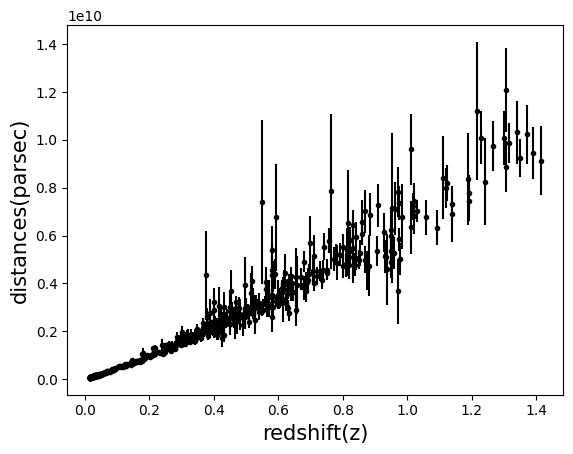

In [8]:
#>>>RUN: L4.2-runcell01

import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv

#Today we are going to start with astro data from here : 
#http://supernova.lbl.gov/Union/
#Let's load the data

label='data/sn_z_mu_dmu_plow_union2.1.txt'
#label='sn_z_mu_dmu_plow_union2.1.txt'


#Table stores name, redshift, distance modulus, distance modulus error
#Let's convert from distance modulus to distance
#See here https://en.wikipedia.org/wiki/Distance_modulus
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

# and the same for uncertainty in distance modulus to uncertainty in distance
def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=np.log(10)/5.
    return const*(10**power)*iMuErr

redshift=[]
distance=[]
distance_err=[]
# read in the data
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    # name, redshift, distance modulus, distance modulus uncertainty
    for row in plots:
        redshift.append(float(row[1]))
        distance.append(distanceconv(float(row[2])))
        distance_err.append(distanceconverr(float(row[2]),float(row[3])))

plt.xlabel('redshift(z)', fontsize=15) #Label x
plt.ylabel('distances(parsec)', fontsize=15)#Label y
# plot with errorbars
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()

This plot has an interesting shape. Instead of looking at the whole plot, we can zoom in on a specific region, namely the area with small redshifts: $z \lt 0.1$

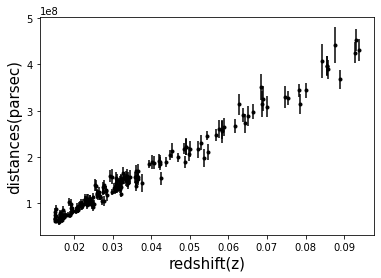

In [4]:
#>>>RUN: L4.2-runcell02

#Now let's zoom in on the small redshift data.
def load(iLabel,iZMax):
    # loads data from file iLabel with redshift below iZMax:
    redshift=[]
    distance=[]
    distance_err=[]
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter='\t')
        for row in plots:
            if float(row[1]) > iZMax:
                continue
            redshift.append(float(row[1]))
            distance.append(distanceconv(float(row[2])))
            distance_err.append(distanceconverr(float(row[2]),float(row[3])))
    return np.array(redshift), np.array(distance), np.array(distance_err)

redshift,distance,distance_err = load(label,0.1)
plt.xlabel('redshift(z)', fontsize=15) #Label x
plt.ylabel('distances(parsec)', fontsize=15)#Label y
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()

<h3>Linear (Least-Squares) Regression</h3>

The data above has what looks like a linear trend. So, we try fitting a linear model; that is, something of form

$$
\begin{equation}
y = Ax + b
\end{equation}
$$

In this case, $x$ is the redshift observed, and $y$ is the distance observed. The goal here is to extract the parameters $A$ and $b$ that make the model's output prediction match those of the data. We can do this analytically, with a somewhat involved derivation.

We start by defining $\hat{y}$, which is the model's prediction of $y$ based on $x$. Our data is a set of $x$ and $y$ values that we'll call $x_i$ and $y_i$. For each $x_i$, we'll get the corresponding prediction $\hat{y}_i$ from the model:

$$
\begin{equation}
\hat{y}_{i} = Ax_{i} + b
\end{equation}
$$

where now we vary $A$ and $b$ to make the model fit. As mentioned earlier, we need to define an objective—some function to measure error—then find parameters to minimize it.

What do we use for error? There are many possibilities. A common one is the square error: we take the difference between each predicted distance $\hat{y}_i$ and the corresponding observed distance $y_i$, and square it. Then we add those up over all our data points. We'll call this metric $Q$:

$$
\begin{eqnarray} 
Q & = & \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^2 \\
Q & = & \sum_{i=1}^{N}\left(y_{i}-Ax_{i}-b\right)^2 \\
\end{eqnarray}
$$

where for the second line we've replaced $\hat{y}$ with the parameterization in our model. By the way, minimizing this particular type of $Q$ is what we call "least-squares" regression.

Now, the minimization step. We can take partial derivatives with respect to $A$ and to $b$ and set each to zero, to find extrema.

$$
\begin{eqnarray} 
\frac{\partial Q}{\partial A} & = & \sum_{i=1}^{N} -2 x_{i} \left(y_{i}-Ax_{i}-b\right) \\
              & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-Ax^{2}_{i}-b x_{i}\right) \\
              & = & 0
\end{eqnarray}          
$$

and for $b$ we have, noting that the average value of $x$ is $\bar{x}=\frac{1}{N} \sum_{i=1}^{N} x_{i}$ (and similar for $\bar{y}$), gives us

$$
\begin{eqnarray} 
\frac{\partial Q}{\partial b} & = & \sum_{i=1}^{N} -2  \left(y_{i}-Ax_{i}-b\right) \\
              & = & 2Nb + 2A\sum_{i=1}^{N}x_{i}-2\sum_{i=1}^{N}y_{i} \\
              & = & 0 \\
{\rm Rearranging,} \\
           b  & = & \frac{1}{N} \sum_{i=1}^{N}y_{i} - \frac{A}{N} \sum_{i=1}^{N}x_{i} \\
              & = & \bar{y} - A\bar{x}      
\end{eqnarray}          
$$

Since we have the data, we can easily calculate $\bar{x}$ and $\bar{y}$ and we have derived a formula for the optimal $b$ in terms of these two averages. (*It's good to keep in mind that the optimal $A$ and $b$ that we find here are only optimal in the sense that they minimize our choice of function $Q$, giving the least-squares fit. If we had a different measure of error, our results might be different.*)



Now, we can go back and solve for $A$, by substituting in our optimal $b$. This gives us

$$
\begin{eqnarray} 
\frac{dQ}{dA} & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-Ax^{2}_{i}-\left(\bar{y} - A\bar{x}\right) x_{i}\right) \\
              & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-x_{i}\bar{y}-Ax^{2}_{i}+ A\bar{x}x_{i}\right) \\                           & = & -2 \sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right)+2A\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right) \\
              & = & 0 \\
{\rm Solving} \\
A & = & \frac{\sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right)}{\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right)} \\
  & = & \frac{\sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right) +\sum_{i=1}^{N}\left(\bar{x}\bar{y}-y_{i}\bar{x}\right)}      
  {\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right) + \sum_{i=1}^{N}\left(\bar{x}^2-x_{i}\bar{x}\right)} \\
  & = & \frac{\sum_{i=1}^{N} \left( x_{i} y_{i}-x_{i}\bar{y}+\bar{x}\bar{y}-y_{i}\bar{x}\right)}      
  {\sum_{i=1}^{N} \left(x^2_{i}-x_{i}\bar{x} + \bar{x}^2-x_{i}\bar{x}\right)} \\
  & = & \frac{\frac{1}{N}\sum_{i=1}^{N} \left(x_{i} - \bar{x} \right) \left(y_{i}-\bar{y}\right)}      
             {\frac{1}{N}\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2}\\
\end{eqnarray} 
$$

Ok, that's a lot of math, but in the end we get an explicit formula for the optimal $A$. To make things look cleaner, we can break the above into a few functions. We define the covariance and variance as: 

$$
\begin{eqnarray} 
\rm{VAR(x)}   & = & \frac{1}{N}\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2 \\
\rm{COV(x,y)} & = & \frac{1}{N}\sum_{i=1}^{N} \left(x_{i} - \bar{x} \right) \left(y_{i}-\bar{y}\right) \\
            A & = & \frac{\rm{COV(x,y)}}{\rm{VAR(x)}}
\end{eqnarray}
$$

We'll talk about the covariance later. The variance is just the variance we defined on the first Lesson, but now in discrete form. Alright, now let's code this guy up!

<a name='exercises_4_2'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_2) | [Next Section](#section_4_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-3.7.1 Complete the Derivation</span>

In the derivation shown previously, how did we get the strange formulation in that second step? Part of the answer is that we could add a term $\sum_{i} x_{i}\bar{x} - \bar{x}^2$ to the denominator because $\sum_{i} x_{i}\bar{x} - \bar{x}^2 = 0$. This helped simplify the derivation. Below, we show a partial proof that $\sum_{i} x_{i}\bar{x} - \bar{x}^2 = 0$:

<br>

$$
\begin{eqnarray} 
\sum_{i} (x_{i}\bar{x}-\bar{x}^{2}) & = & \sum_{i} x_{i}\bar{x} -\sum_{i} \bar{x}^{2} \\
& = & [\mathrm{insert\,missing\,step}]\\
& = & 0 \\
\end{eqnarray}
$$  

<br>

In order for this to be true, what must the value of $\sum_{i} x_{i}\bar{x}$ be? Express your answer in terms of `N` for $N$ and `xbar` for $\bar{x}$.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

$$
\begin{eqnarray} 
\sum_{i} (x_{i}\bar{x}-\bar{x}^{2}) & = & \sum_{i} x_{i}\bar{x} -\sum_{i} \bar{x}^{2} \\
& = & \bar{x}\sum_{i} x_{i} -N\bar{x}^{2}\\
& = & \bar{x}N\bar{x}-N\bar{x}^{2} \\
& = & 0 \\
\end{eqnarray}
$$  
  
**EXPLANATION:**
    
See above.
    
</div>


<a name='section_3_8'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L3.8 Linear Regression: Coding Example</h2>  

| [Top](#section_3_0) | [Previous Section](#section_3_7) | [Exercises](#exercises_3_8) | [Next Section](#section_3_9) |


<h3>Overview</h3>


Now, it's time to run the linear regression we mathematically derived in the section above! Below is an implementation of regression based on our calculation, and the units are explained following this implementation.


In [ ]:
#>>>RUN: L4.3-runcell01

#Let's run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

def regress(redshift,distance):
    #Let's regress
    var=variance(redshift)
    cov=covariance(redshift,distance)
    A=cov/var
    b=distance.mean()-A*redshift.mean()
    #Done!
    return A,b

def plotAll(redshift,distance,distance_err,A,b):
    #now let's plot it
    xvals = np.linspace(0,0.1,100)
    yvals = []
    for pX in xvals:
        yvals.append(linear(pX,A,b))

    #Plot the line
    plt.plot(xvals,yvals)
    plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
    plt.xlabel('redshift(z)', fontsize=15) #Label x
    plt.ylabel('distances(parsec)', fontsize=15)#Label y
    plt.show()
    #Print it out
    print("Hubbles Constant:",1e6*3e5/A,"intercept",b)#Note 1e6 is from pc to Mpc and 3e5 is c in km/s

A,b=regress(redshift,distance)
plotAll(redshift,distance,distance_err,A,b)

From the data we're fitting, we can figure out the units of the slope $A$ :

$$A = \frac{\rm distance(pc) }{\rm  Redshift~(z)}$$

where the redshift $z$ is the fractional (dimensionless) change in wavelength. Hubble's constant is defined as

$$h_{0} = \frac{\rm Recession\, speed~(km/s)}{\rm distance(Mpc)}$$ 

For nonrelativistic speeds, the magnitude of redshift roughly corresponds to the recession speed by $z\approx v/c$. So, we do the unit conversions to obtain

$$h_{0} = \frac{1}{A}\frac{\rm c~(km/s)}{10^{-6}}=\frac{1}{A}\frac{\rm 3\times10^{5}~(km/s)}{10^{-6}} $$

<a name='exercises_3_8'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_8) | [Next Section](#section_3_9) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-4.3.1 Uncertainty in $h_{0}$</span>

Now we wish to obtain the uncertainty on $h_{0}$, which we call $\sigma_{h_0}$, where we will use the definition:

$$h_{0} =\frac{1}{A}\frac{\rm 3\times10^{5}~(km/s)}{10^{-6}} $$


Assume that we know the uncertainty on $A$, which we call $\sigma_{A}$. What is the value of $\sigma_{h_0}$? Express your answer in terms of `A` for $A$, `h_0` for $h_{0}$, and `sigma_A` for $\sigma_{A}$.

**Hint: To answer this question, you need to use propagation of uncertainty!**

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**


$$\sigma_{h_0} = \frac{h_{0}}{A} \sigma_{A}$$  
    
 
**EXPLANATION:**
    
We know the functional form of the dependence of $h_0$ on $A$; $h_0(A)=f(A)=C/A$, where $C$ is the numerical factor shown above. For a function of a random variable, we know the uncertainty scales approximately with the derivative in this fashion.
    
$$
\begin{eqnarray} 
f(A) & = & \frac{C}{A},\\ 
\frac{df}{dA} & = & -\frac{C}{A^2},\\
\sigma_{f} & = & \left | \frac{df}{dA} \right | \sigma_{A} \\
\sigma_{h_0} & = \frac{C}{A^2} \sigma_{A} \\
\end{eqnarray}
$$  
    
This is the functional dependence on $A$. In terms of $h_{0}$, we have:
    
$$\sigma_{h_0} = \frac{h_{0}}{A} \sigma_{A}$$  
    
</div>


>#### Follow-up 4.3.1a (ungraded)
>
>What is the uncertainty $\sigma_{h_0}$ written only in terms of the slope $A$ and its uncertainty? 
